# Change in RMNP Average Snowpack with Annual Temperatures

Caleb Cripe (Colorado State University)  
Caitlin Rasbid (Colorado State University)

# Background

The issue of climate change has caused regime alterations across aspects of ecosystems, impacting ecosystems functioning and environmental services we utilize. Especially in the Western US, we rely on snowpack that accumulates during the winter to provide water for the drier months of the year, which means that decreased snowpack results in scarcity. Globally, snowpack substantially contributes to the livelihoods of over a billion people, who are both directly and indirectly dependent on meltwater resources. (Irannezhad, Ronkanen, & Malekian ([2022](#ref-irannezhad2022snowpack))) Decreased annual snowpack can have adverse impacts on fire conditions, making wildfires that start more dangerous and difficult to control. Reduced meltwater, soil moisture, and fuel moisture can greatly increase fire potential in forest systems, which we have already begun to see across the West. (Gergel, Nijssen, Abatzoglou, Lettenmaier, & Stumbaugh ([2017](#ref-Gergel2017-vr))) These factors increase the need for snowpack monitoring so urban populations are able to recognize when droughts are likely to occur and when fire risk is higher than average.

# Data

The Snow Telemetry Network, or SNOTEL, collects snowpack and other water supply data across the US to support resource management initiatives. We will utilize SNOTEL data from the six sites located in Rocky Mountain National Park, pulling data on average snow water equivalent recorded, average snow depth, average snow temperature, (soil temperature observed?) and mean air temperature. The six sites we plan to analyze located within RMNP are Phantom Valley, Lake Irene, Willow Park, Bear Lake, Copeland Lake, and Wild Basin. Using the SNOTEL data, we can extract daily records for each of the variables at each of the six sites in RMNP over a 25 year period, allowing us to observe changes from the first quarter of the 21st century.

# Exploring Our Data

We will filter the dataset to only include entries from the past 25 years at the six sites of interest in RMNP, Phantom Valley, Lake Irene, Willow Park, Bear Lake, Copeland Lake, and Wild Basin. We will then filter out any variables that are not being assessed for relationship to annual snowpack, and create annual aggregate variables from average snow water equivalent recorded, average snow depth, average snow temperature, and mean air temperature to simplify the daily data into an annual average that will aid in assessing trends over many years. We will be doing this according to a snow year, with a year being from October-September.

In [ ]:
library(readr)
install.packages("janitor", repos = "https://cloud.r-project.org")


The downloaded binary packages are in
    /var/folders/jn/hk4fnzlx679cs3m0_lnzh7hh0000gn/T//RtmpTo6KDR/downloaded_packages


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Rows: 9133 Columns: 37

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Date
dbl (36): Bear Lake (322) Snow Water Equivalent (in) Start of Day Values, Be...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
library(tidyr)

rmnp_clean <- rmnp_snotel %>%
  drop_na()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

`geom_smooth()` using formula = 'y ~ x'

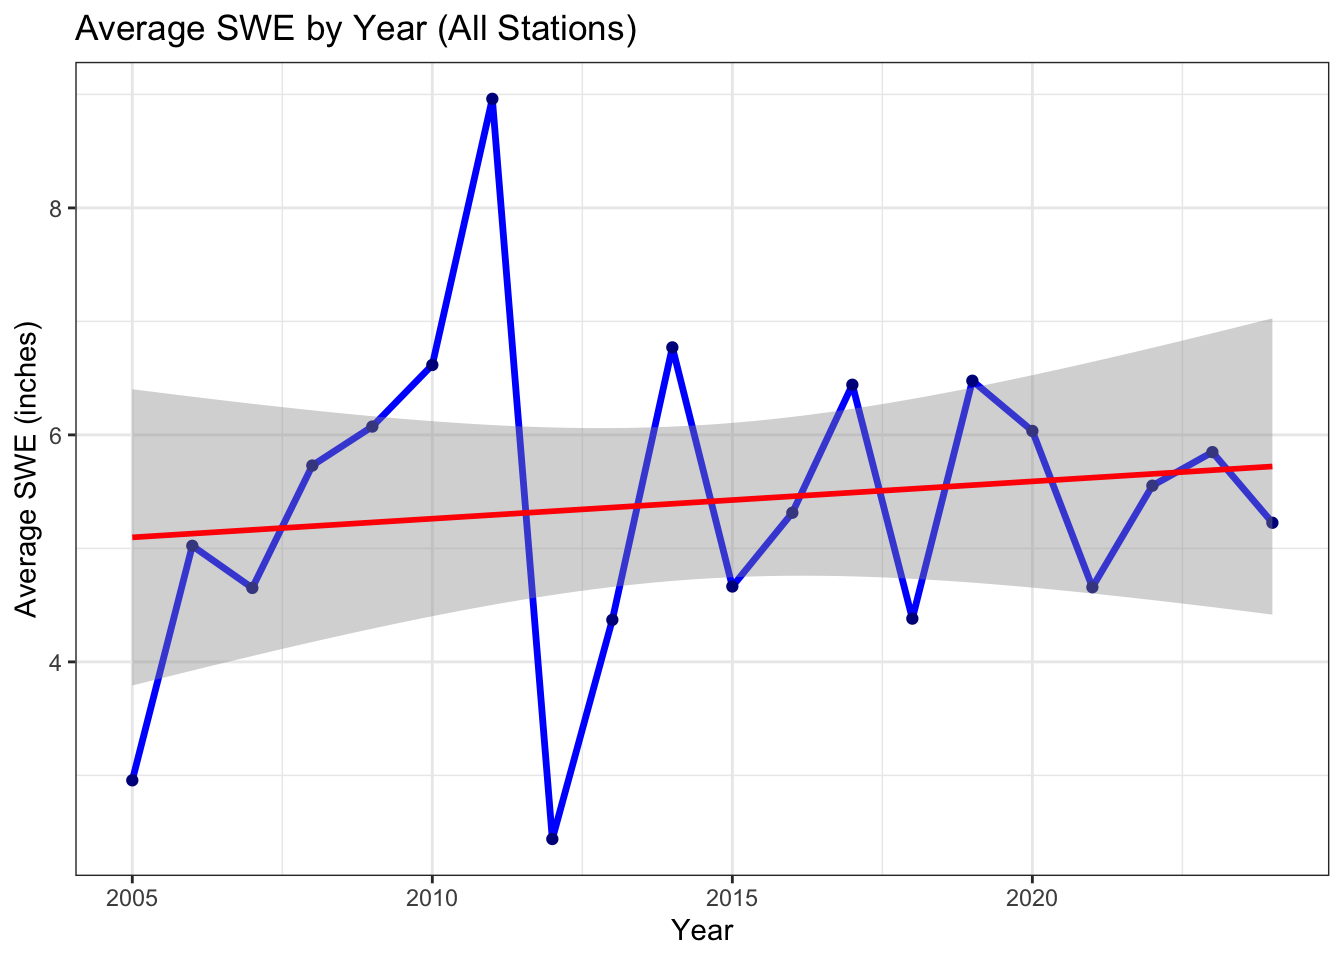

In [ ]:
library(tidyverse)

`geom_smooth()` using formula = 'y ~ x'

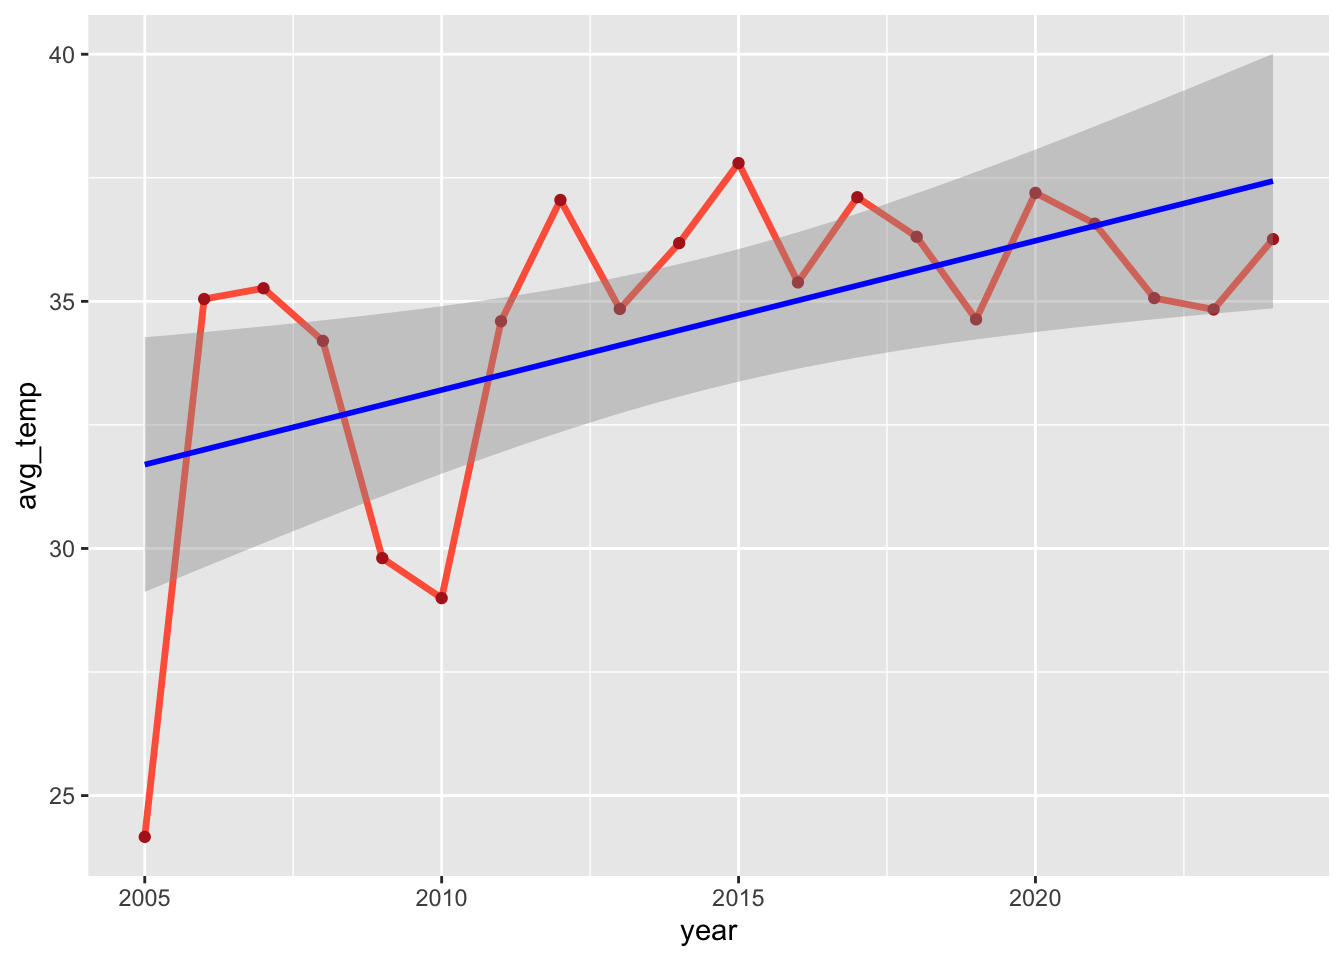

NULL

In [ ]:
temp_data <- df %>%
  select(year, contains("air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

annual_temp <- temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(avg_temp = mean(temp, na.rm = TRUE))

ggplot(annual_temp, aes(x = year, y = avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")

## Preliminary Methods

To begin, we will conduct an exploratory data analysis using visual elements such as ggplots to represent trends in SWE over time and descriptive methods such as ANOVA to determine the differences in SWE by site. Visual exploration is important to understand if the nature of the relationship between variables is linear or if some transformation would better represent the relationship. After our visual exploration, we will perform any transformations necessary prior to model creation. If there appears to be a significant difference in SWE based on site, we may need to introduce site-specific variables such as elevation and latitude that will capture some individual site characteristics.

We can use other summary statistics such as cor() to assess any underlying correlations between variables that will influence model design and assess trends over time. Then we will use a simple linear regression with SWE as the predicted value and the five annual aggregate variables as predictors. This will allow us to get an idea of what variables are significant, if the relationship is positive or negative, and how well the model fits based on the R squared model. Likely the linear regression will not be a sufficient model, so we will use machine learning to create a workflow with additional model types, such as random forest or neural network. We could run into challenges in several ways, such as unexpected relationships between variables, missing data, or roadblocks associated with unfamiliarity with R and handling data. We expect to handle these challenges in different ways, but are preparing for them by reviewing past lecture material and re-familiarizing ourselves with commands that we need to use to achieve our goals.

These methods will provide us with helpful insights into our overall research question in several ways. First, visual exploration will show differences SWE over time and across sites, suggesting the impacts of climate change and which ecosystems seem to be most resistant to this change, if any. The ANOVA and summary statistics will serve a similar purpose. The linear and machine learning models we will build will be useful in understanding what impacts SWE to be able to predict future SWE levels based on environmental indicators.

# Site-by-Site Analysis

## Bear Lake (322)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

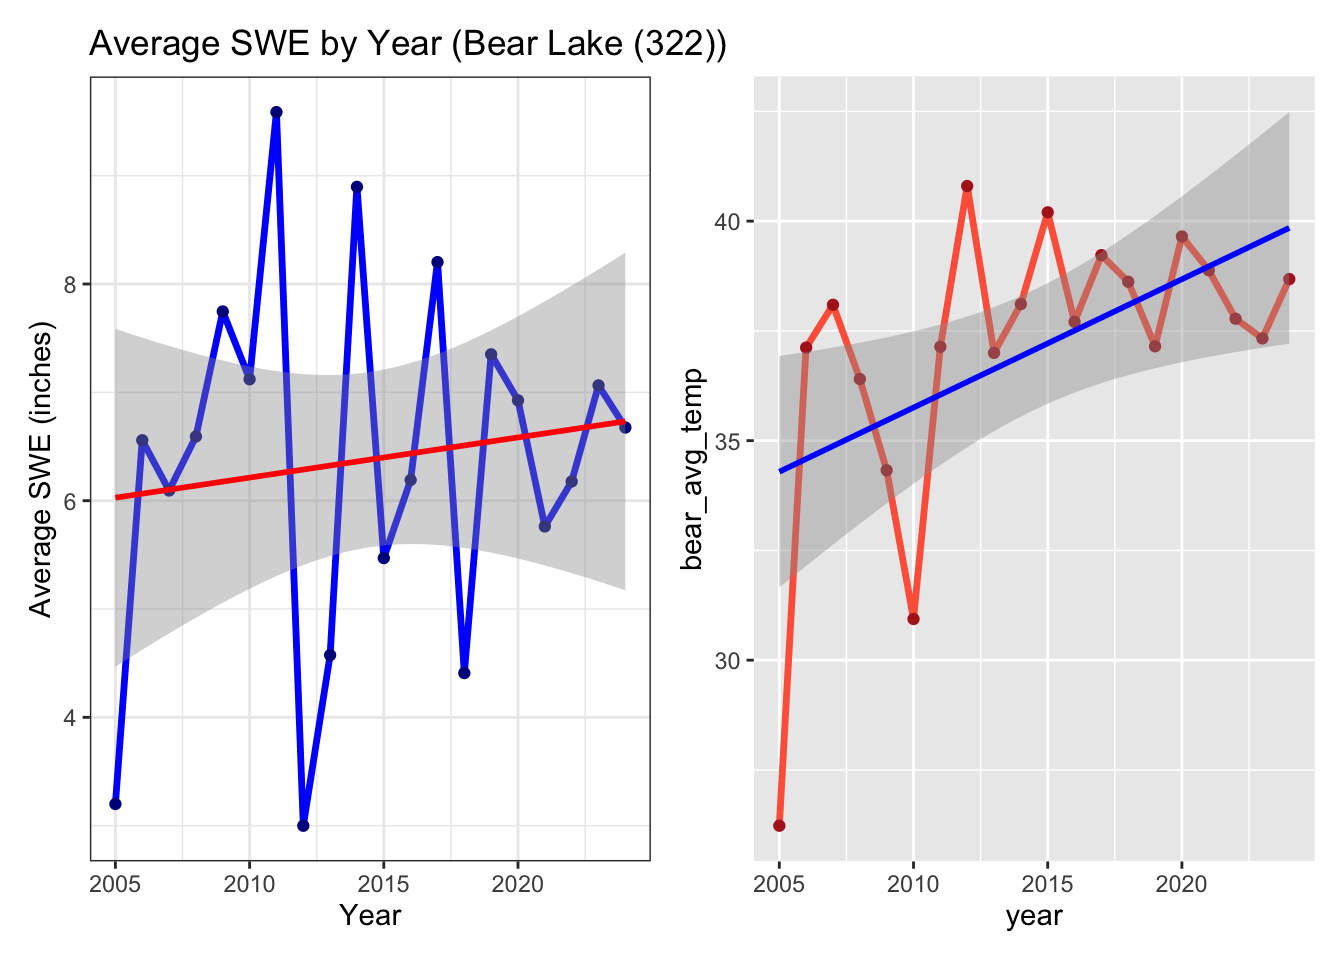

In [ ]:
library(patchwork)
bear_swe_data <- df %>%
  select(year, contains("322_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

bear_swe_data <- bear_swe_data %>%
  mutate(swe = as.numeric(swe))

bear_annual_swe <- bear_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(bear_avg_swe = mean(swe, na.rm = TRUE)) 

bear_swe_plot <- ggplot(bear_annual_swe, aes(x = year, y = bear_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Bear Lake (322))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

bear_temp_data <- df %>%
  select(year, contains("322_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

bear_annual_temp <- bear_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(bear_avg_temp = mean(temp, na.rm = TRUE))

bear_temp_plot <- ggplot(bear_annual_temp, aes(x = year, y = bear_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Bear Lake (322))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

## Copeland Lake (412)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

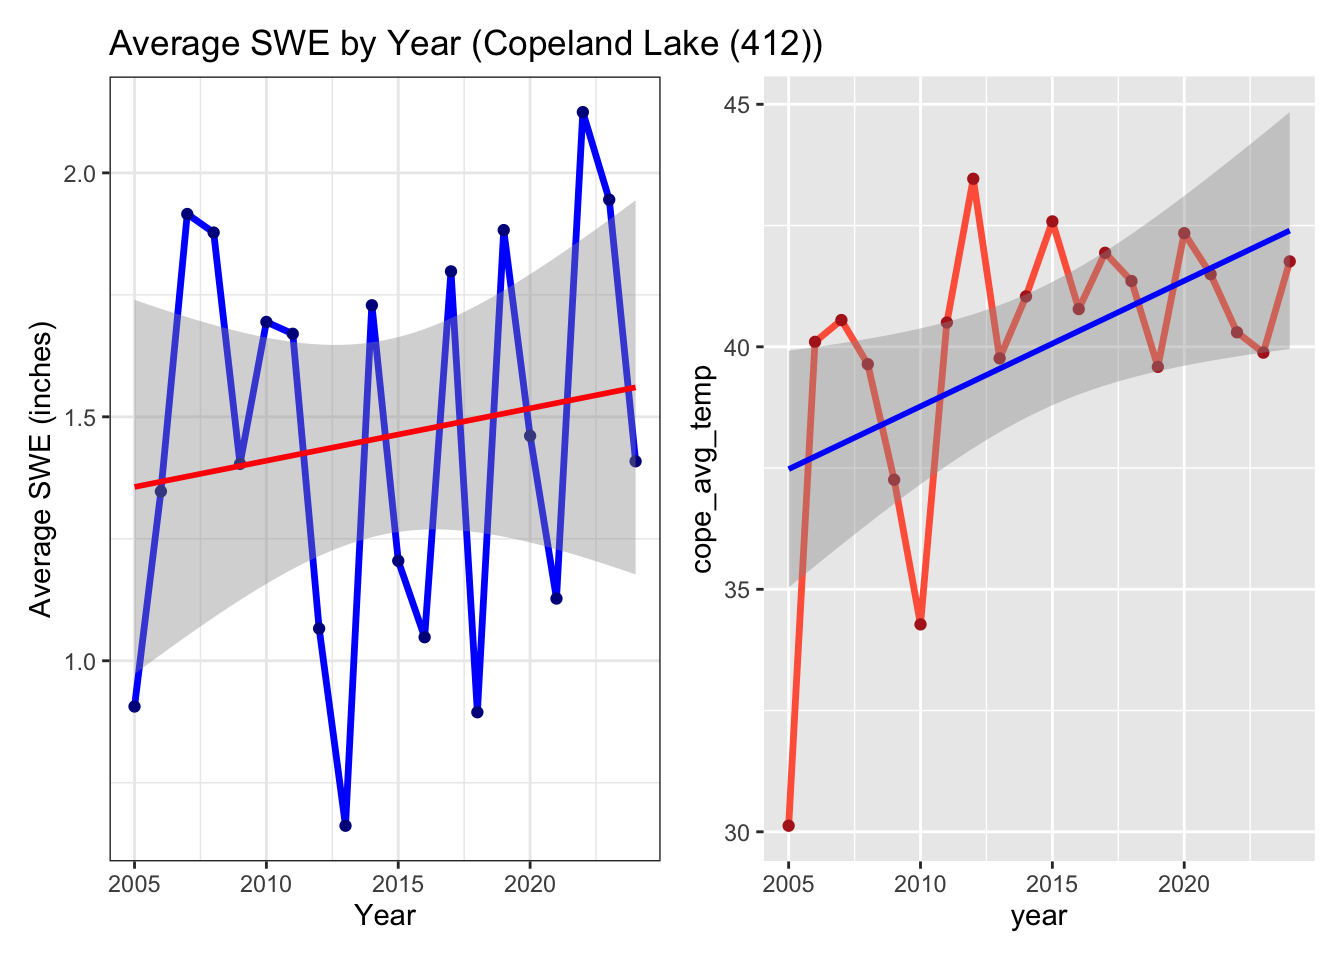

In [ ]:
cope_swe_data <- df %>%
  select(year, contains("412_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

cope_swe_data <- cope_swe_data %>%
  mutate(swe = as.numeric(swe))

cope_annual_swe <- cope_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(cope_avg_swe = mean(swe, na.rm = TRUE)) 

cope_swe_plot <- ggplot(cope_annual_swe, aes(x = year, y = cope_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Copeland Lake (412))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

cope_temp_data <- df %>%
  select(year, contains("412_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

cope_annual_temp <- cope_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(cope_avg_temp = mean(temp, na.rm = TRUE))

cope_temp_plot <- ggplot(cope_annual_temp, aes(x = year, y = cope_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Copeland Lake (412))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

## Lake Irene (565)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

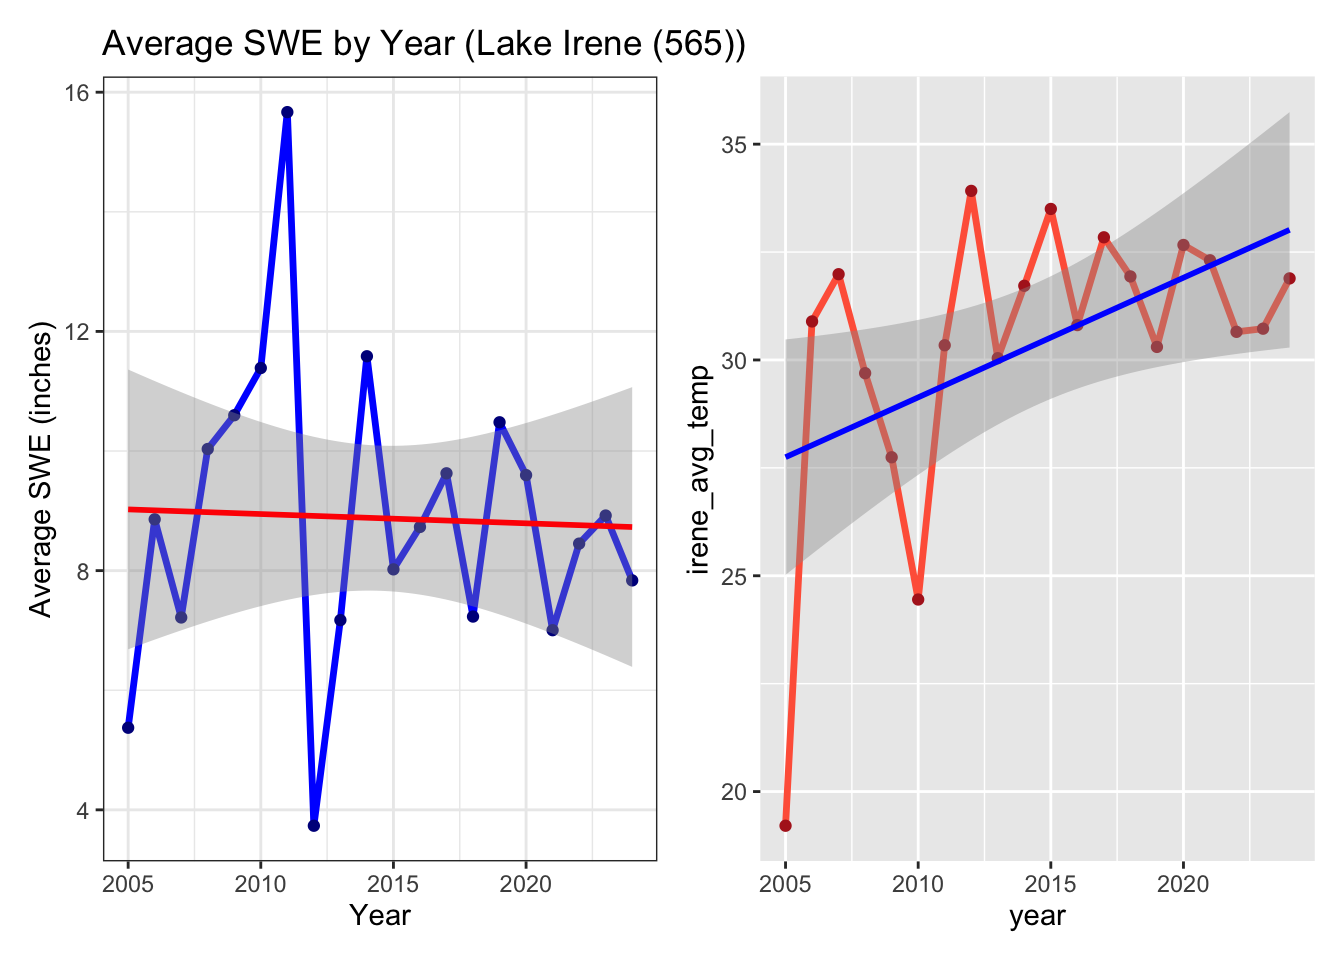

In [ ]:
irene_swe_data <- df %>%
  select(year, contains("565_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

irene_swe_data <- irene_swe_data %>%
  mutate(swe = as.numeric(swe))

irene_annual_swe <- irene_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(irene_avg_swe = mean(swe, na.rm = TRUE)) 

irene_swe_plot <- ggplot(irene_annual_swe, aes(x = year, y = irene_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Lake Irene (565))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

irene_temp_data <- df %>%
  select(year, contains("565_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

irene_annual_temp <- irene_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(irene_avg_temp = mean(temp, na.rm = TRUE))

irene_temp_plot <- ggplot(irene_annual_temp, aes(x = year, y = irene_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Lake Irene (565))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

## Phantom Valley (688)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

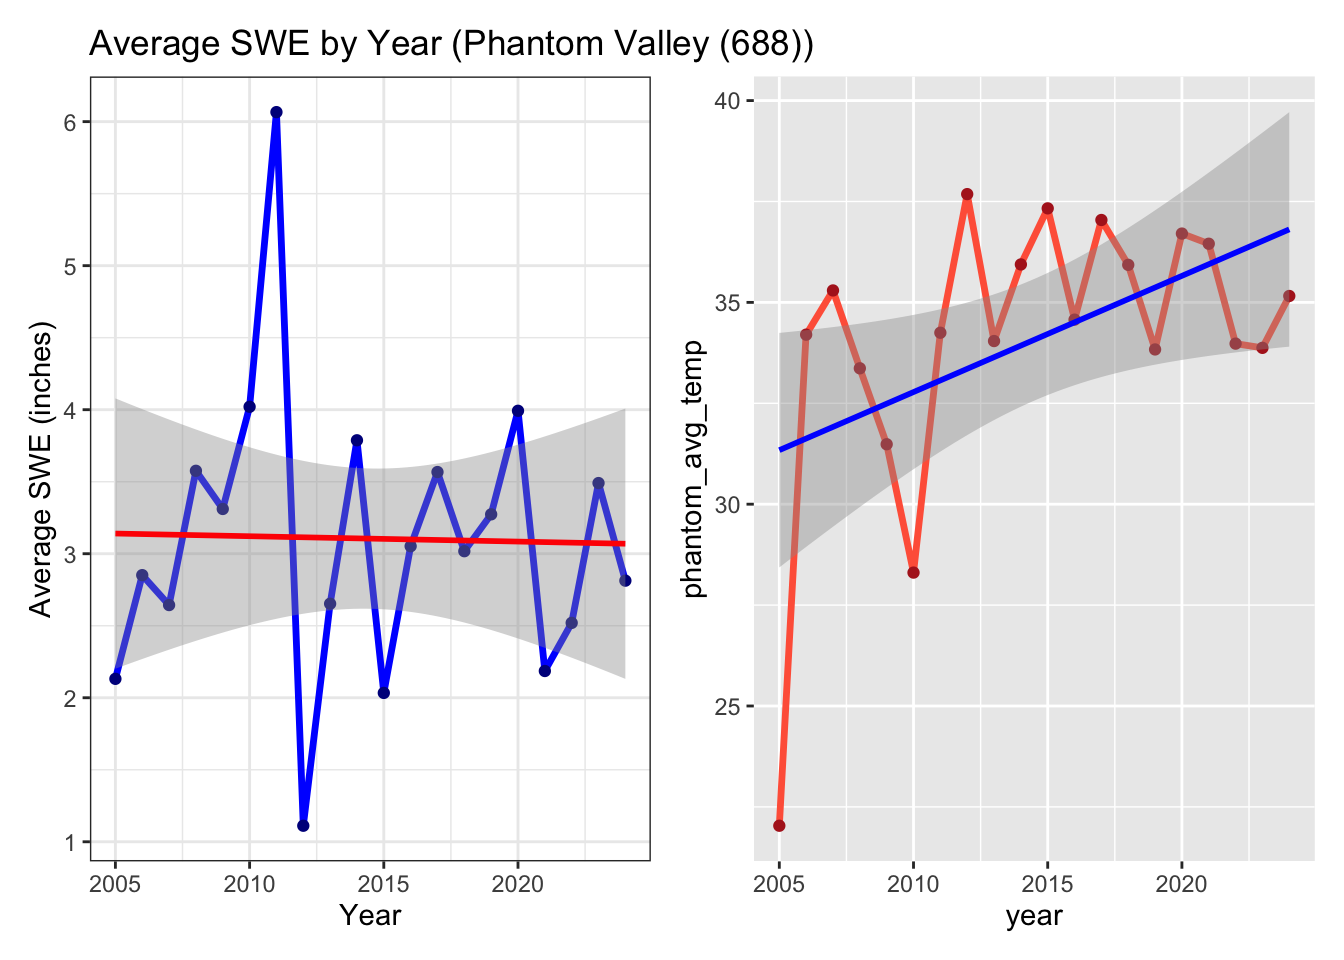

In [ ]:
phantom_swe_data <- df %>%
  select(year, contains("688_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

phantom_swe_data <- phantom_swe_data %>%
  mutate(swe = as.numeric(swe))

phantom_annual_swe <- phantom_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(phantom_avg_swe = mean(swe, na.rm = TRUE)) 

phantom_swe_plot <- ggplot(phantom_annual_swe, aes(x = year, y = phantom_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Phantom Valley (688))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

phantom_temp_data <- df %>%
  select(year, contains("688_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

phantom_annual_temp <- phantom_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(phantom_avg_temp = mean(temp, na.rm = TRUE))

phantom_temp_plot <- ggplot(phantom_annual_temp, aes(x = year, y = phantom_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Phantom Valley (688))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

## Wild Basin (1042)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

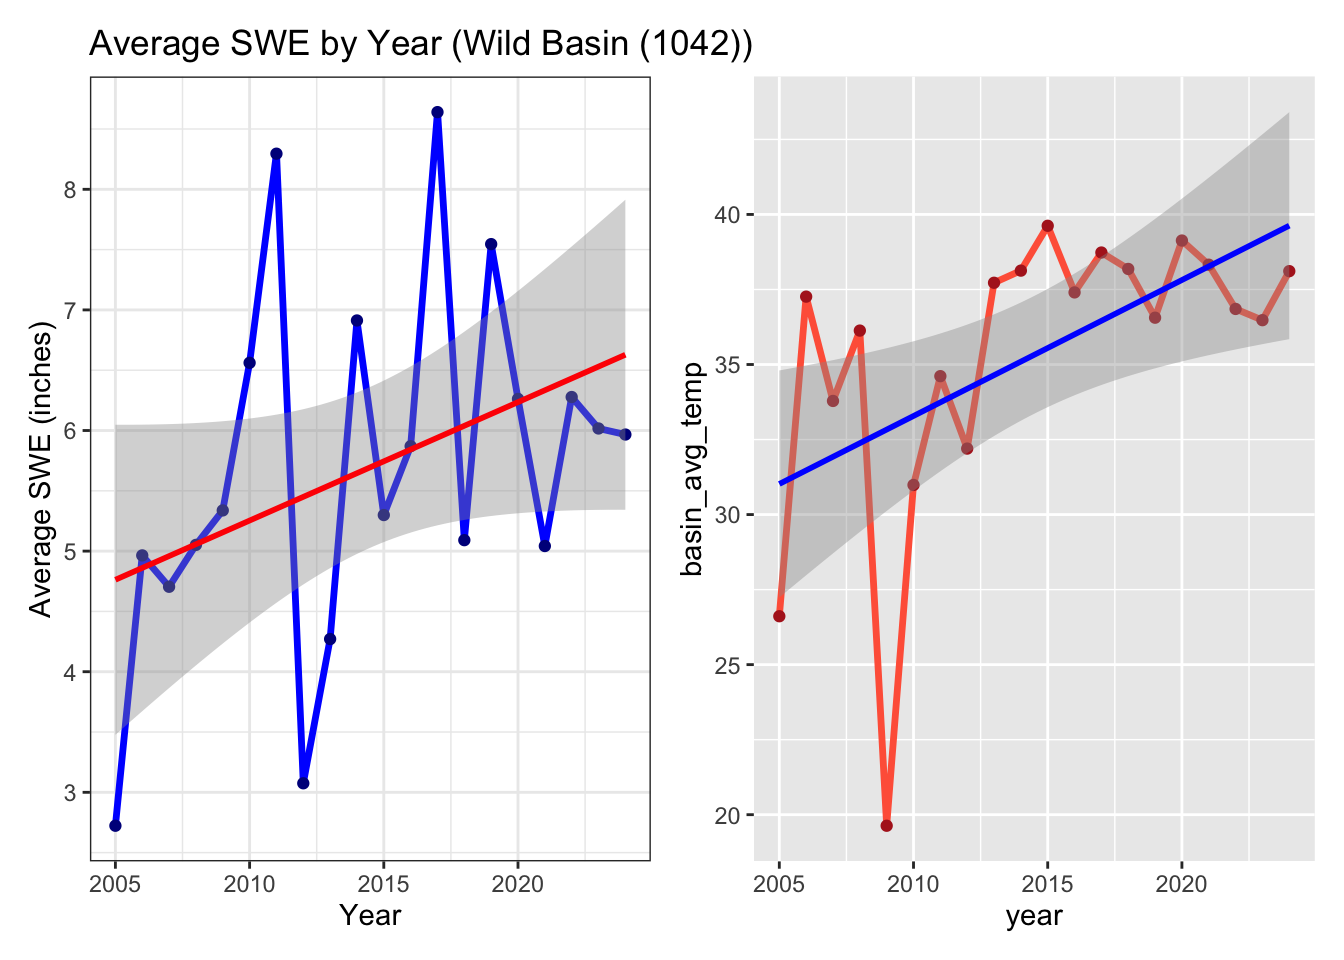

In [ ]:
basin_swe_data <- df %>%
  select(year, contains("1042_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

basin_swe_data <- basin_swe_data %>%
  mutate(swe = as.numeric(swe))

basin_annual_swe <- basin_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(basin_avg_swe = mean(swe, na.rm = TRUE)) 

basin_swe_plot <- ggplot(basin_annual_swe, aes(x = year, y = basin_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Wild Basin (1042))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

basin_temp_data <- df %>%
  select(year, contains("1042_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

basin_annual_temp <- basin_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(basin_avg_temp = mean(temp, na.rm = TRUE))

basin_temp_plot <- ggplot(basin_annual_temp, aes(x = year, y = basin_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Wild Basin (1042))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

## Willow Park (870)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

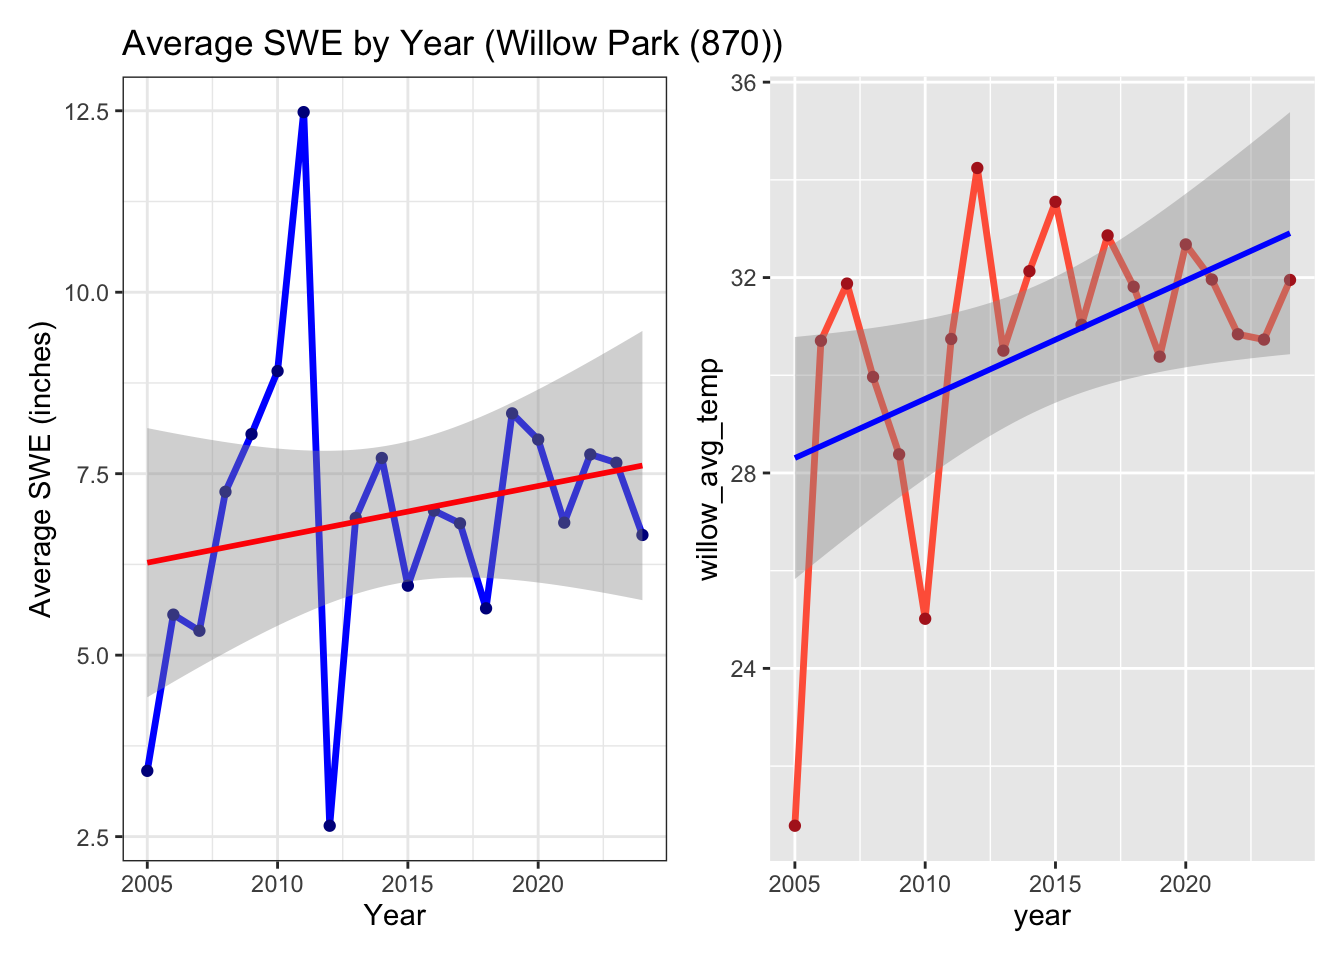

In [ ]:
willow_swe_data <- df %>%
  select(year, contains("870_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

willow_swe_data <- willow_swe_data %>%
  mutate(swe = as.numeric(swe))

willow_annual_swe <- willow_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(willow_avg_swe = mean(swe, na.rm = TRUE)) 

willow_swe_plot <- ggplot(willow_annual_swe, aes(x = year, y = willow_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Willow Park (870))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

willow_temp_data <- df %>%
  select(year, contains("870_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

willow_annual_temp <- willow_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(willow_avg_temp = mean(temp, na.rm = TRUE))

willow_temp_plot <- ggplot(willow_annual_temp, aes(x = year, y = willow_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Willow Park (870))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

# Statistical Analysis

## SWE One-Way ANOVA

In [ ]:
library(dplyr)
library(tidyr)
library(stringr)

site_swe_data <- df %>%
  select(year, contains("snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  ) %>%
  mutate(
    site_code = str_extract(station, "_\\d+_") %>%
                str_replace_all("_", "")
  ) %>%
  arrange(as.numeric(site_code))

swe_anova <- aov(swe ~ site_code, data = site_swe_data)
summary(swe_anova)

               Df  Sum Sq Mean Sq F value Pr(>F)    
site_code       5  239830   47966    1022 <2e-16 ***
Residuals   37776 1773767      47                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## TEMP One-Way ANOVA

In [ ]:
site_temp_data <- df %>%
  select(year, contains("air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(
    site_code = str_extract(station, "_\\d+_") %>%
                str_replace_all("_", "")
  ) %>%
  arrange(as.numeric(site_code))

temp_anova <- aov(temp ~ site_code, data = site_temp_data)
summary(temp_anova)

               Df  Sum Sq Mean Sq F value Pr(>F)    
site_code       5  435442   87088   333.5 <2e-16 ***
Residuals   37776 9864814     261                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Two-Way ANOVA

In [ ]:
df_merged <- merge(site_temp_data, site_swe_data, by = c("site_code", "year"))

aov_swe_continuous <- aov(swe ~ temp * site_code, data = df_merged)
summary(aov_swe_continuous)

                     Df    Sum Sq  Mean Sq  F value Pr(>F)    
temp                  1   2393314  2393314  50201.9 <2e-16 ***
site_code             5  77745211 15549042 326154.9 <2e-16 ***
temp:site_code        5     39165     7833    164.3 <2e-16 ***
Residuals      12482022 595065286       48                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Discussion

In our initial data visualization, we graphed the annual aggregate snow water equivalent by year for and the mean aggregate temperature by year for the sites in Rocky Mountain National Park. We included lines of best fit for both of the graphical representations of these variables to get a sense for general trends we might be looking at. In the average aggregate snow water equivalent by year data, there appears to be a slight upward trend throughout the 20-year period of analysis. Similarly, in the data for the mean aggregate temperature by year there appears to be an increasing trend, though much sharper than the snow water equivalent graph.

Following these initial aggregate analyses, we separated each of the sites and conducted the same exploratory analysis for all six over the 20-year period to observe individual variations within each site. Contrary to our hypothesis, four out of the six sites exhibited increased snow water equivalent levels with increasing temperatures over the 20-year period of study. This may indicate that increased temperatures may reduce snowfall, but increase the overall density of water content within the snow itself leading to higher recorded snow water equivalents.

Through our use of ANOVA analysis we were able to conduct one-way analyses with both individual variables for each study site, as well as observing the relationship between the two variables. Our analysis of snow water content revealed that site number was a strong indicator of the variable, suggesting that site-based differences such as altitude might affect snowpack in relation to temperature. Similarly, we found that temperature was similarly impacted by site number, pointing to a difference of variables based on site conditions. In our two-way analysis, we found that around 48% of the variance in snow water equivalence could be explained by temperature, which suggests that additional variables account for the remaining 50% of variance. This could be a jumping point for additional study, prompting the exploration of other variables within the data set.

We used a Seasonal-Trend Decomposition using LOESS (STL) for monthly average snow water equivalent (SWE) data across the six sites. The results of the decomposition were analyzed by components to better understand how SWE changes year over year. The mean_swe graph represents the original time series data, indicating that each site shows strong seasonal SWE peaks between March-April, with Lake Irene consistently having the highest SWE and Copeland Lake and Willow Park rank lowest. The trend component graph smooths out seasonal variance to show trends year to year, with site differences emerging. Some sites, like Lake Irene and Phantom Valley show declines in SWE post ~2011 specifically. Other sites, like Copeland Lake, reflect a relatively stable if not slightly increasing SWE trend. These differences between trends suggest site-specific variability in SWE in response to changing weather and climate patterns. More data analysis is needed at the site level to assess how other variables such as elevation or latitude may contribute to differences in trends. The season_year component captures annual patterns and indicates that SWE is highly seasonal following a similar pattern each year, with the greatest snowpack in March-April, then decreasing during the summer months and accumulating through winter. The season_week indicates there is no additional weekly pattern to seasonality, but this may not accurately reflect weekly variation as the time series was built on monthly average values to avoid noise in the data. The remainder component represents residuals and displays no major anomalies, suggesting that the STL decomposition captures the structure of the time series well. There are minor outliers, with a spike in 2011 accompanied by variance in the pattern until 2015. These outliers could reflect year to year weather variations and may be influenced by extreme weather events or El Niño/La Niña years.

Though our study indicates that more research into the effects of climate change on alpine snowpack levels is needed to further explore the relationship between temperature changes and snow water equivalents, it may open new conversations around unexpected results of climate change. Our study is limited by the timespan of our data, which only shows a snapshot of recorded trends relating to snowpack in Rocky Mountain National Park, though further analysis could build upon our study with an expanded time frame. Additionally, our study was limited by the time we had to complete it and the extent of our data analysis skills. The relationship between snow water equivalents and other variables in the data could be further explored, highlighting the extent to which multivariate analysis could explain some of the additional variance.

Gergel, D. R., Nijssen, B., Abatzoglou, J. T., Lettenmaier, D. P., & Stumbaugh, M. R. (2017). Effects of climate change on snowpack and fire potential in the western USA. *Clim. Change*, *141*(2), 287–299. https://doi.org/<https://doi.org/10.1007/s10584-017-1899-y>

Irannezhad, M., Ronkanen, A.-K., & Malekian, A. (2022). Editorial: Climate impacts on snowpack dynamics. *Frontiers in Earth Science*, *10*. <https://doi.org/10.3389/feart.2022.970981>